In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
gps=np.load(r'value')
latitude,longitude=gps[0][0],gps[0][1]

In [4]:
first_frame=cv2.imread(r"preview.png")
import Sabaina_24100017_PA3
first_frame=cv2.resize(first_frame,(500,500)) #resizing to ensure that the image size is smaller that the total display(screen size)
first_frame_points=Sabaina_24100017_PA3.point_reader(first_frame)
print(first_frame_points)



[[424 275]
 [343 246]
 [327 236]
 [330 221]
 [366 292]
 [314 251]
 [299 238]
 [200 292]
 [210 279]
 [ 24 260]
 [ 71 250]]


(11, 2)


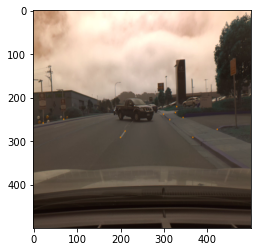

In [5]:
print(first_frame_points.shape)
plt.imshow(first_frame)
plt.show()

(11, 2)


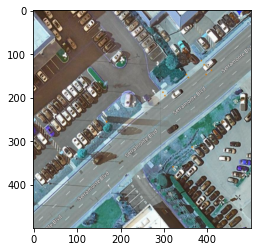

In [6]:
satellite=cv2.imread(r"satellite.png")
satellite=cv2.resize(satellite,(500,500)) #resizing to ensure that the image size is smaller that the total display(screen size)
satellite_points=Sabaina_24100017_PA3.point_reader(satellite)
print(satellite_points.shape)
plt.imshow(satellite)
plt.show()

In [7]:
matrix=[]
for i in range(len(first_frame_points)):
    x=first_frame_points[i][0]
    y=first_frame_points[i][1]
    x_=satellite_points[i][0]
    y_=satellite_points[i][1]
    matrix.append([x,y,1,0,0,0,-x*x_,-x_*y,-x_])
    matrix.append([0,0,0,x,y,1,-x*y_,-y*y_,-y_])

In [8]:
u, s, vh = np.linalg.svd(matrix) # Replace it with your H matrix
vh = np.transpose(vh)
P = vh[:,len(vh[0])-1]

P = np.array([P[0:3], P[3:6], P[6:9]])
print("Homography matrix\n",P)


Homography matrix
 [[-3.68932364e-04 -3.98732829e-03  9.84008439e-01]
 [-4.89824970e-05 -8.77735907e-04  1.78061186e-01]
 [-9.99893210e-07 -8.96856626e-06  2.19072220e-03]]


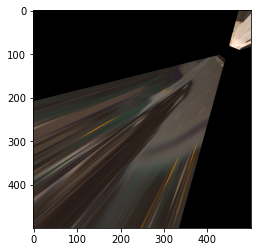

In [15]:

out = cv2.warpPerspective(first_frame,P,(first_frame.shape[0], first_frame.shape[1]))

plt.imshow(out)
plt.show()


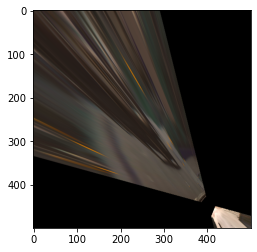

In [10]:
out=np.rot90(np.rot90(np.rot90(out)))
plt.imshow(out)
plt.show()
# remove bottom

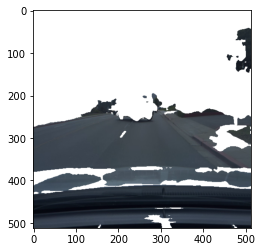

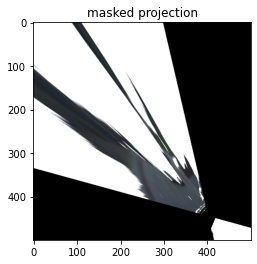

In [17]:
masked_frame=np.load(r'masked_frame.npy')
plt.imshow(masked_frame[0])
plt.show()
out = cv2.warpPerspective(masked_frame[0],P,(first_frame.shape[0], first_frame.shape[1]))

plt.imshow(np.rot90(np.rot90(np.rot90(out))))
plt.title("masked projection") 
plt.show()


In [ ]:
# yolop